In [8]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [19]:
# Load dataset
iris = load_iris()
X = iris.data    # Features
y = iris.target  # Labels

In [10]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # k = 3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Predict
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


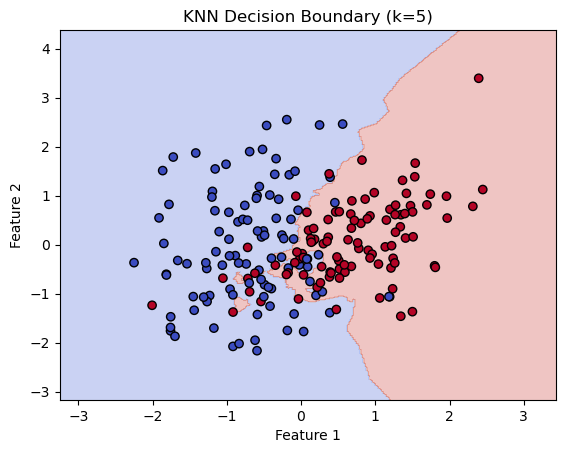

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Create 2D dataset (for easy plotting)
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# 2. Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# 4. Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour (decision boundary)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
